In [1]:
import numpy as np         
import pandas as pd
import matplotlib.pyplot as plt      
import random                        

from keras.datasets import mnist     
from keras.models import Sequential  

from keras.layers.core import Dense, Dropout, Activation 
from keras.utils import np_utils                         

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [4]:
test_data = pd.read_csv('/content/test.csv', delimiter = ',', header = 0, usecols = [x for x in range(0, 784)])

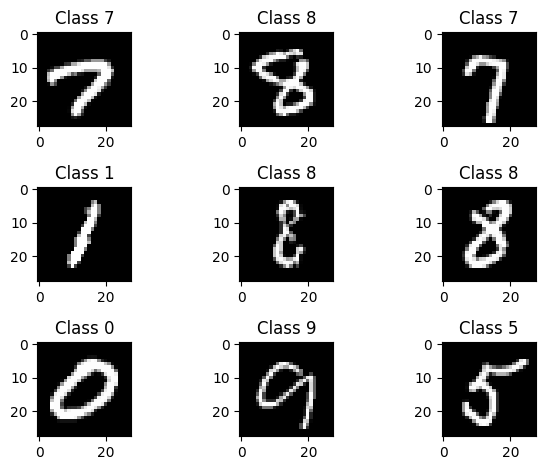

In [5]:
for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))
    
plt.tight_layout()

In [6]:
X_train = X_train.reshape(60000, 784) 
X_test = X_test.reshape(10000, 784)   

X_train = X_train.astype('float32')   
X_test = X_test.astype('float32')

X_train /= 255                        
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [7]:
no_classes = 10

Y_train = np_utils.to_categorical(y_train, no_classes)
Y_test = np_utils.to_categorical(y_test, no_classes)

In [8]:
model = Sequential()

In [9]:
model.add(Dense(512, input_shape=(784,))) 

In [10]:
model.add(Activation('relu'))

In [11]:
model.add(Dropout(0.2))

In [12]:
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

In [13]:
model.add(Dense(10))
model.add(Activation('softmax'))

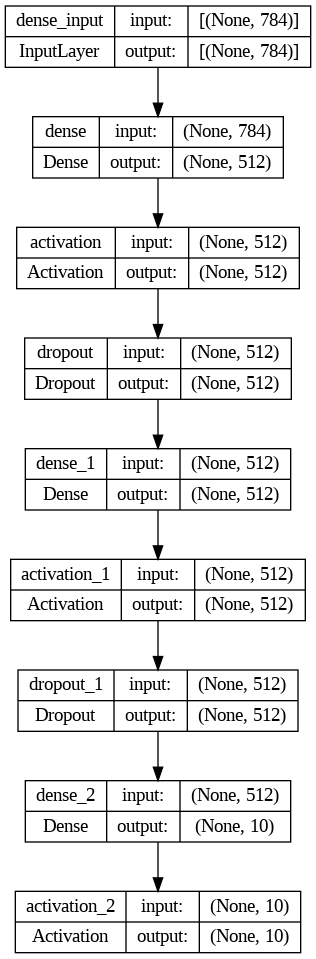

In [14]:
from keras.utils import plot_model
plot_model(model, to_file='/content/model_chart.png', show_shapes=True, show_layer_names=True)
from IPython.display import Image
Image("/content/model_chart.png")

In [15]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=10,
          verbose=1)

Epoch 1/10
469/469 [==============================] - 11s 20ms/step - loss: 0.2520 - accuracy: 0.9252
Epoch 2/10
469/469 [==============================] - 8s 18ms/step - loss: 0.1008 - accuracy: 0.9687
Epoch 3/10
469/469 [==============================] - 9s 20ms/step - loss: 0.0713 - accuracy: 0.9776
Epoch 4/10
469/469 [==============================] - 9s 20ms/step - loss: 0.0593 - accuracy: 0.9804
Epoch 5/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0430 - accuracy: 0.9859
Epoch 6/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0393 - accuracy: 0.9871
Epoch 7/10
469/469 [==============================] - 9s 20ms/step - loss: 0.0343 - accuracy: 0.9884
Epoch 8/10
469/469 [==============================] - 10s 20ms/step - loss: 0.0287 - accuracy: 0.9901
Epoch 9/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0289 - accuracy: 0.9905
Epoch 10/10
469/469 [==============================] - 9s 20ms/step - loss: 0.0252 - accu

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
score = model.evaluate(X_test, Y_test)
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0706 - accuracy: 0.9824
Test accuracy: 0.9824000000953674


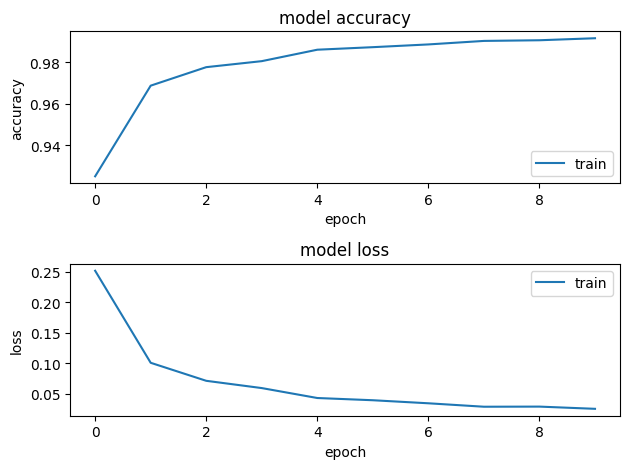

In [19]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [20]:
results = model.predict(test_data)

875/875 [==============================] - 3s 3ms/step


In [21]:
results = np.argmax(results, axis =0)
results = pd.Series(results,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("/content/submission.csv",index=False)

In [22]:
submission

,ImageId,Label
0,1,1.0
1,2,17.0
2,3,0.0
3,4,4.0
4,5,12.0
...,...,...
27995,27996,NaN
27996,27997,NaN
27997,27998,NaN
27998,27999,NaN


In [23]:
predicted_classes = np.argmax(model.predict(X_test), axis=-1)

correct_indices = np.nonzero(predicted_classes == y_test)[0]

incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

313/313 [==============================] - 1s 4ms/step


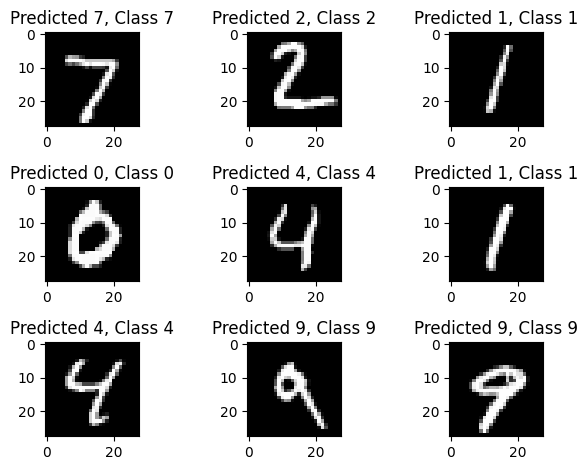

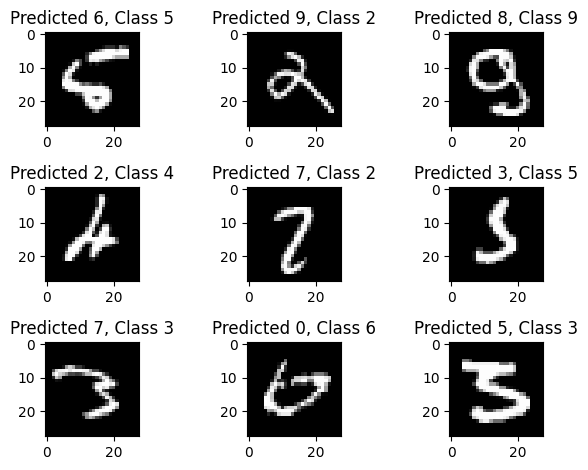

In [24]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.tight_layout()
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    
plt.tight_layout()